# Linear Regression Models and Regularization

Ozone dataset with components: ozone, radiation, temperature, and wind.

In [1]:
import pandas as pd
ozone = pd.read_csv('/Datasets/Ozone.csv')

**Data Visualization**

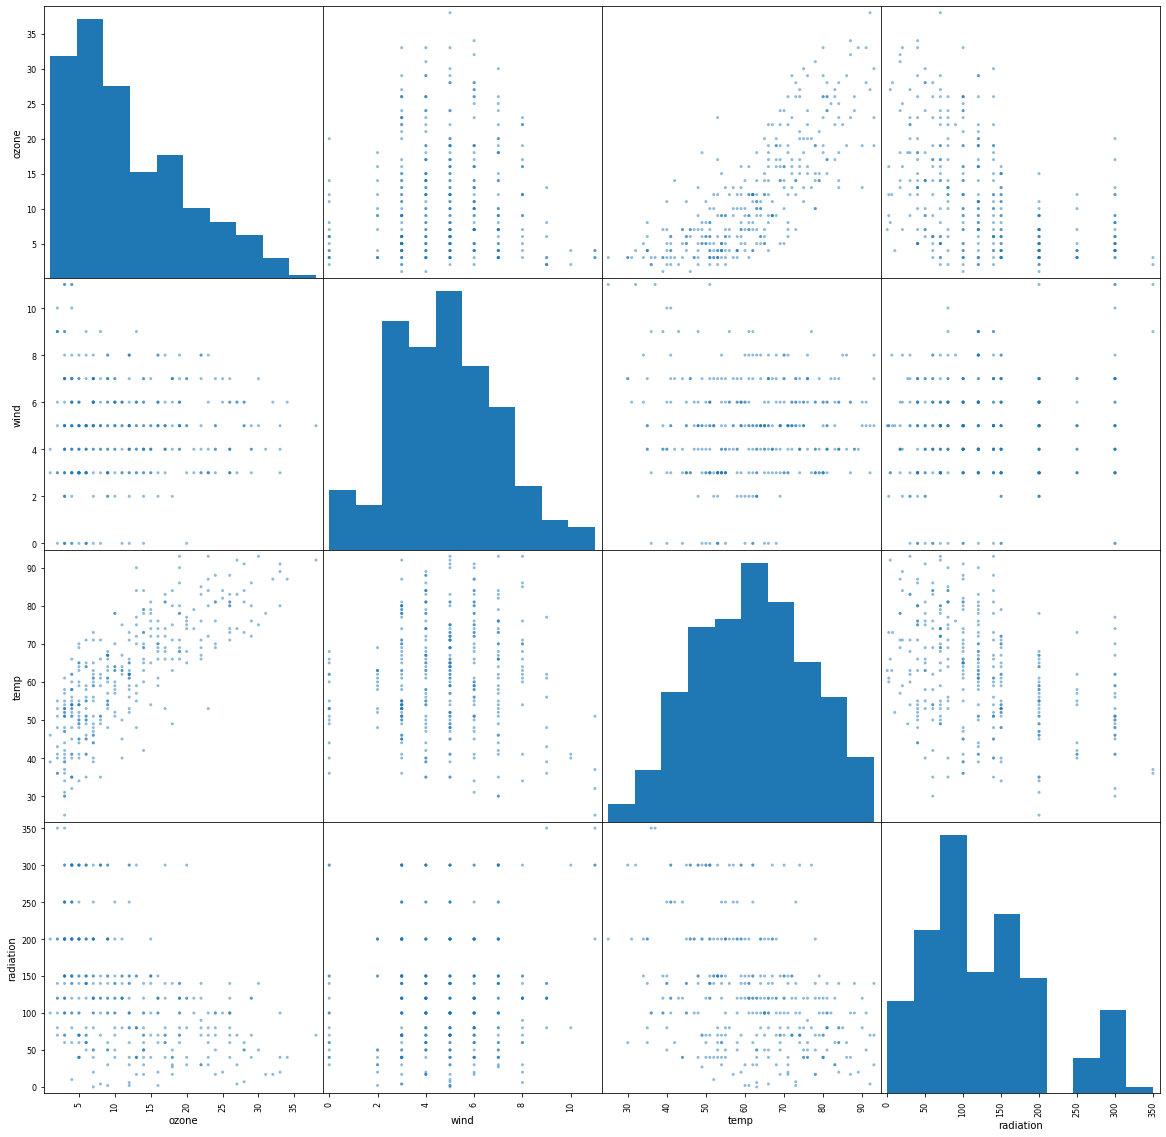

In [2]:
import matplotlib.pyplot as plt
# Plot scatter matrix
ozone.describe()
pd.plotting.scatter_matrix(ozone , figsize=[20,20])
plt.show()

**Build Models**

In [3]:
import numpy as np
# Split data into training and test
ozone_train = ozone.sample(frac=0.7, random_state=1)
ozone_test = ozone.loc[~ozone.set_index(list(ozone.columns)).index.isin(ozone_train.set_index(list(ozone_train.columns)).index)]

In [4]:
ozone_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 59 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ozone      231 non-null    int64
 1   wind       231 non-null    int64
 2   temp       231 non-null    int64
 3   radiation  231 non-null    int64
dtypes: int64(4)
memory usage: 9.0 KB


In [5]:
ozone_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 325
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ozone      98 non-null     int64
 1   wind       98 non-null     int64
 2   temp       98 non-null     int64
 3   radiation  98 non-null     int64
dtypes: int64(4)
memory usage: 3.8 KB


In [6]:
from sklearn.linear_model import LinearRegression
# Train models to compare (no regularization)
ozone_ln_reg = LinearRegression(normalize=True)
ozone_ln_reg = ozone_ln_reg.fit(ozone_train.drop('ozone', axis=1),ozone_train['ozone'])

In [7]:
from sklearn.linear_model import Ridge
# L2 (Ridge) Regularization
ozone_ridge_reg = Ridge(alpha=0.1, max_iter=1000, normalize=True, solver='lsqr',
                        tol=0.001)
ozone_ridge_reg = ozone_ridge_reg.fit(ozone_train.drop('ozone', axis=1),
                                      ozone_train['ozone'])

In [8]:
from sklearn.linear_model import Lasso
# L1 (Lasso) Regularization
ozone_lasso_reg = Lasso(alpha=0.1, max_iter=1000, normalize=True, tol=0.0001)
ozone_lasso_reg = ozone_lasso_reg.fit(ozone_train.drop('ozone', axis=1),
                                      ozone_train['ozone'])

In [9]:
from sklearn.linear_model import RidgeCV
# Cross validation to determined optimal alpha
ozone_ridgecv_reg = RidgeCV(alphas=(0.1, 1.0, 10.0), normalize=True, 
                            scoring='neg_mean_absolute_error', cv=10)
ozone_ridgecv_reg = ozone_ridgecv_reg.fit(ozone_train.drop('ozone', axis=1),
                                          ozone_train['ozone'])

**Model Summary (coefficients)**

In [10]:
print("Linear Coef: " + str(ozone_ln_reg.coef_)
      + "\nRidge Coef: " + str(ozone_ridge_reg.coef_) 
      + "\nLasso Coef: " + str(ozone_lasso_reg.coef_)
      + "\nCV Coef: " + str(ozone_ridgecv_reg.coef_)
      + "\nCV alpha: " + str(ozone_ridgecv_reg.alpha_))

Linear Coef: [ 0.10311549  0.43112547 -0.01550551]
Ridge Coef: [ 0.09542626  0.38881159 -0.01701033]
Lasso Coef: [ 0.          0.35814532 -0.00158744]
CV Coef: [ 0.09542626  0.38881159 -0.01701033]
CV alpha: 0.1


**Predictions and Evaluation**

In [11]:
# Predict using models
ozone_ln_pred = ozone_ln_reg.predict(ozone_test.drop('ozone', axis=1))
ozone_ridge_pred = ozone_ridge_reg.predict(ozone_test.drop('ozone', axis=1))
ozone_lasso_pred = ozone_lasso_reg.predict(ozone_test.drop('ozone', axis=1))
ozone_ridgecv_pred = ozone_ridgecv_reg.predict(ozone_test.drop('ozone', axis=1))

In [12]:
from math import sqrt
from sklearn import metrics
# Calculate MAE, RMSE, and R-squared for all models
ozone_ln_mae = metrics.mean_absolute_error(ozone_test['ozone'], ozone_ln_pred)
ozone_ln_rmse = sqrt(metrics.mean_squared_error(ozone_test['ozone'], ozone_ln_pred))
ozone_ln_r2 = metrics.r2_score(ozone_test['ozone'], ozone_ln_pred)

ozone_ridge_mae = metrics.mean_absolute_error(ozone_test['ozone'], ozone_ridge_pred)
ozone_ridge_rmse = sqrt(metrics.mean_squared_error(ozone_test['ozone'], ozone_ridge_pred))
ozone_ridge_r2 = metrics.r2_score(ozone_test['ozone'], ozone_ridge_pred)

ozone_lasso_mae = metrics.mean_absolute_error(ozone_test['ozone'], ozone_lasso_pred)
ozone_lasso_rmse = sqrt(metrics.mean_squared_error(ozone_test['ozone'], ozone_lasso_pred))
ozone_lasso_r2 = metrics.r2_score(ozone_test['ozone'], ozone_lasso_pred)

ozone_ridgecv_mae = metrics.mean_absolute_error(ozone_test['ozone'], ozone_ridgecv_pred)
ozone_ridgecv_rmse = sqrt(metrics.mean_squared_error(ozone_test['ozone'], ozone_ridgecv_pred))
ozone_ridgecv_r2 = metrics.r2_score(ozone_test['ozone'], ozone_ridgecv_pred)

ozone_eval = pd.DataFrame({"Linear":{"MAE":ozone_ln_mae, "RMSE":ozone_ln_rmse, "R2":ozone_ln_r2},
                           "Ridge":{"MAE":ozone_ridge_mae, "RMSE":ozone_ridge_rmse,
                                    "R2":ozone_ridge_r2},
                           "Lasso":{"MAE":ozone_lasso_mae, "RMSE":ozone_lasso_mae,
                                    "R2":ozone_lasso_r2},
                           "Ridge CV":{"MAE":ozone_ridgecv_mae, "RMSE":ozone_ridgecv_rmse,
                                       "R2":ozone_ridgecv_r2}
                          })

In [13]:
print(ozone_eval)

        Linear     Ridge     Lasso  Ridge CV
MAE   3.853166  3.717781  3.623668  3.717781
RMSE  4.780063  4.622688  3.623668  4.622688
R2    0.511097  0.542759  0.529081  0.542759
